In [1]:
# Import Library

import numpy as np
import matplotlib.pylab as plt
from numpy import random


In [2]:
# Function that takes in the mass and kinetic energy of a particle and returns  β

def beta(m,ke):
  
  m = m*5.609e29
  #print(m)
  Etot = (m + ke) 
  p = np.sqrt(Etot**2 - m**2)
  b = p/Etot
  
  return b

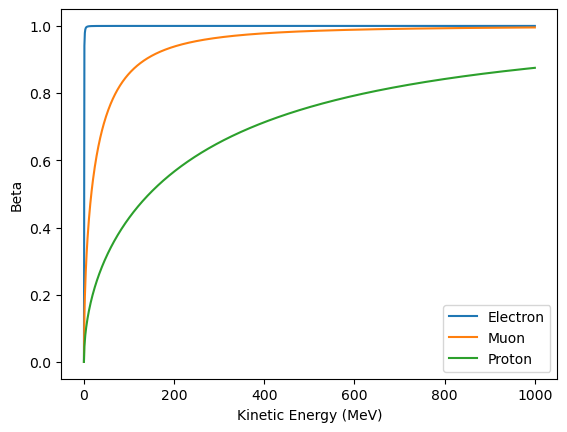

In [3]:
#Plot of  β  versus kinetic energy for 3 particles: proton, muon, electron

kin = np.linspace(0,1000,1000)

be = beta(9.11e-31,kin)
bp = beta(1.67e-27,kin)
bm = beta(1.88e-28,kin)

plt.figure()
plt.plot(kin,be,label=r'Electron')
plt.plot(kin,bm,label=r'Muon')
plt.plot(kin,bp,label=r'Proton')
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel("Beta")
plt.legend()


In [4]:
# Function to calculate the Bethe-Bloch formula.

def bethebloch(rho,Z,A,kin):             # ke is in mev or ev. Si units for everything else
  N = 6.022e23                       
  r = 2.82e-15                           # m
  me = 9.11e-31                          # kg
  c = 3e8                                # m/s
  A = A/1000                             # divide by 1000 g -> kg
  b = beta(1.67e-27,kin)                 # use beta function
  gamma = 1/(np.sqrt(1 - b**2))
  I = 10*Z*1.602e-19                     # convert ev to J

  #print(b)
  
  num = 2*me*(c**2)*(gamma**2)*(b**2)
  ln = np.log(num/I)
  dE = rho*4*np.pi*N*(r**2)*me*(c**2)*(Z/A)*(1/b**2)*(ln-b**2)
  return dE*6.242*10**9                  # Return Si units J/m -> MeV/mm

# Check formula

copper = bethebloch(8940,29,63.55,1)
al = bethebloch(2710,13,26.98,1)
water = bethebloch(997,10,18.015,1)

print(f"For a proton with 1MeV of kinetic energy in copper, dE/dx is {copper:.5} MeV/mm")
print(f"For a proton with 1MeV of kinetic energy in aluminum, dE/dx is {al:.4} MeV/mm")
print(f"For a proton with 1MeV of kinetic energy in water, dE/dx is {water:.4} MeV/mm")


For a proton with 1MeV of kinetic energy in copper, dE/dx is 118.95 MeV/mm
For a proton with 1MeV of kinetic energy in aluminum, dE/dx is 53.21 MeV/mm
For a proton with 1MeV of kinetic energy in water, dE/dx is 24.65 MeV/mm


Text(0, 0.5, 'dE/dx [MeV/m')

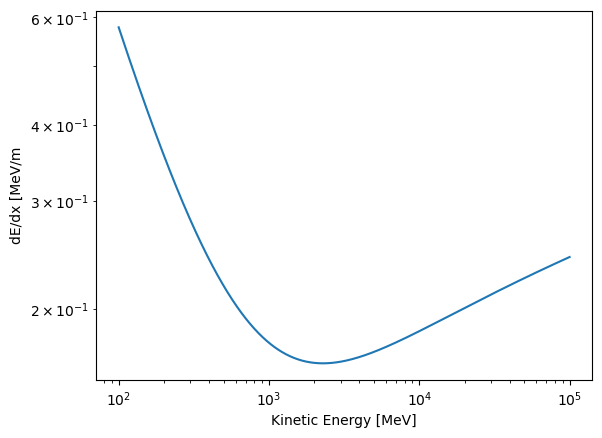

In [5]:
# Plot dE/dx

de = []
kin = np.linspace(100,100000,100000)

for i in kin:
  
  y = bethebloch(997,8,18.0158,i)
  de.append(y) 

#print(kin[190])
#print(de)

plt.plot(kin,de)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Kinetic Energy [MeV]")
plt.ylabel("dE/dx [MeV/m")

Depth traveled for 100 MeV is 8.2 cm



<Figure size 640x480 with 0 Axes>

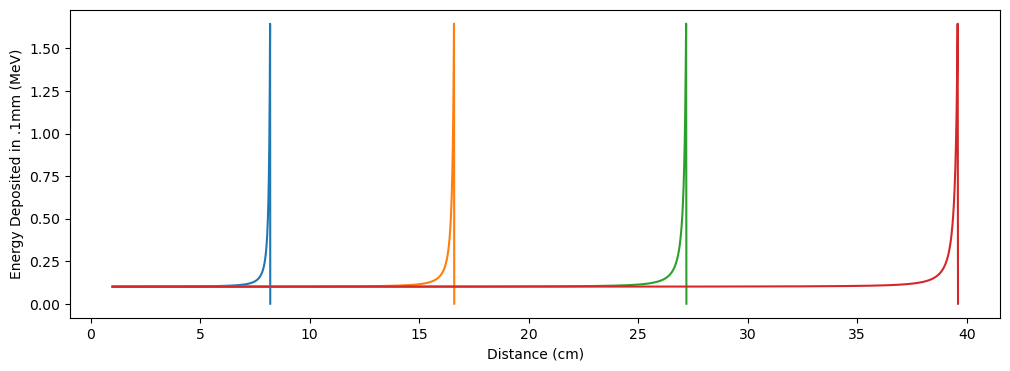

In [6]:
# Simulate passage of proton through water
##########################################################################
#Distance traveled
def dist(E):
  travel = 0
  Tdist = []
  #elost = []
  

  while E>1:
    E = E - bethebloch(997,10,18.015,E)
    travel = travel + .1
    Tdist.append(travel)

  return Tdist

##########################################################################
# Energy Lost 
def elost(E):
  de = []
  el = []

  while E>1:
    EL = E - bethebloch(997,10,18.015,E)
    E = E - .1
    de.append(100-EL)

  for i in range(1,len(de)):
    i = de[i]-de[i-1]
    el.append(i)

  el.append(0)

  return el

##########################################################################
y1 = elost(100)
d1 = dist(100)
x1 = np.linspace(1,d1[-1],len(y1))

y2 = elost(150)
d2 = dist(150)
x2 = np.linspace(1,d2[-1],len(y2))

y3 = elost(200)
d3 = dist(200)
x3 = np.linspace(1,d3[-1],len(y3))

y4 = elost(250)
d4 = dist(250)
x4 = np.linspace(1,d4[-1],len(y4))

plt.figure()
plt.figure(figsize=(12,4))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.xlabel("Distance (cm)")
plt.ylabel("Energy Deposited in .1mm (MeV)")

print(f"Depth traveled for 100 MeV is {d1[-1]:.3} cm")
#print(y1[-1])
print()

The total energy deposited is 47.53 MeV


Text(0, 0.5, 'Energy Deposited in .1mm (MeV)')

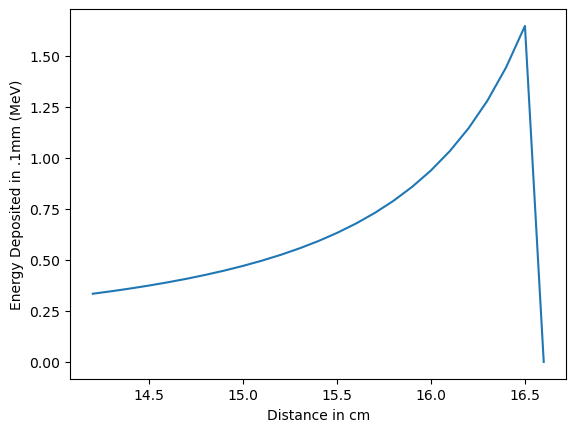

In [7]:
# Amount of energy deposited at the end for the 150MeV

y2 = elost(150)
d2 = dist(150)
x2 = np.linspace(1,d2[-1],len(y2))

finalinch = []
x2 = []
for i in d2:
  if i > (d2[-1] - 2.5):
    finalinch.append(i)
                     

y2partial = y2[-250:]
y2 = y2[-25:]

num = 0
for i in y2partial:
  num += i


print(f"The total energy deposited is {num:.4} MeV")


plt.plot(finalinch,y2)
plt.xlabel("Distance in cm")
plt.ylabel("Energy Deposited in .1mm (MeV)")


Text(0.5, 0, 'Beams Energy (MeV)')

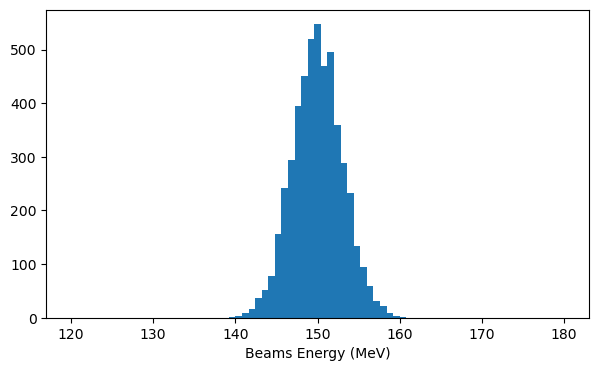

In [8]:
# Randomise beam for imperfections us to 2% 

vals = []
sigma = 0.02*150
ntrials = 5000

for i in range(ntrials):
  measured_v = random.normal(150, sigma)

  vals.append(measured_v)

plt.figure(figsize=(7,4))
plt.hist(vals,bins=75,range=(120,180))
plt.xlabel(r'Beams Energy (MeV)')

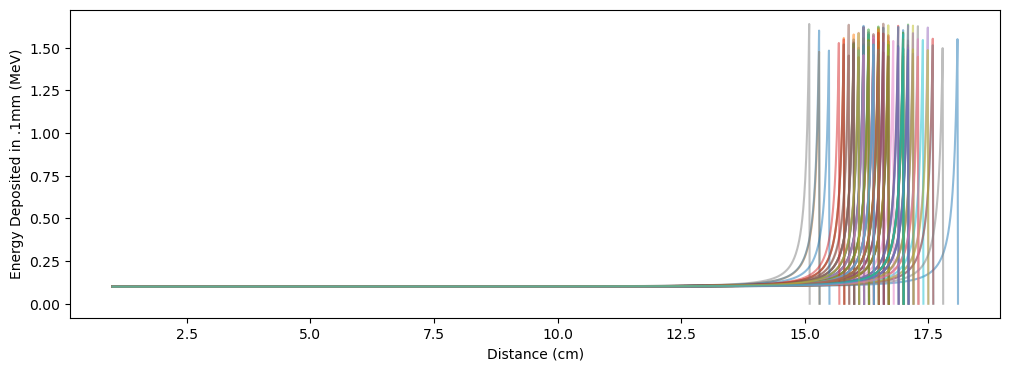

In [9]:
# How far does the random beam go for many trials

ntrials = 100
vals = []
for i in range(ntrials):
  measured_v = random.normal(150, sigma)

  vals.append(measured_v)

plt.figure(figsize=(12,4))
#print(vals)

depths = []

for i in vals:
  y = elost(i)
  d = dist(i)
  x = np.linspace(1,d[-1],len(y))
  depths.append(x[-1])
  plt.plot(x,y,alpha = .5)
  plt.xlabel("Distance (cm)")
  plt.ylabel("Energy Deposited in .1mm (MeV)")


51.0 percent of the protons hit the tumor


<Figure size 1200x400 with 0 Axes>

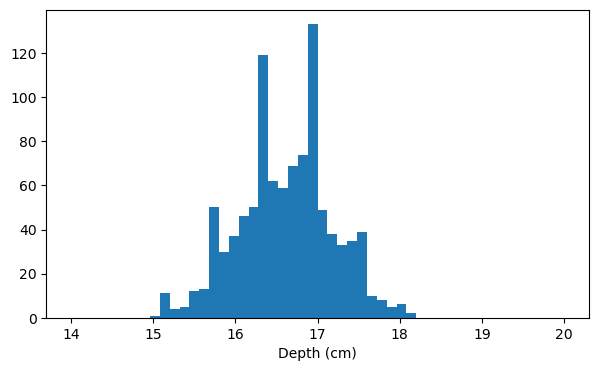

In [11]:
# Do we hit the tumor if its 16.5cm to 17.5cm deep

ntrials = 1000
vals = []
for i in range(ntrials):
  measured_v = random.normal(150, sigma)

  vals.append(measured_v)

plt.figure(figsize=(12,4))
#print(vals)

depths = []

for i in vals:
  y = elost(i)
  d = dist(i)
  #x = np.linspace(1,d[-1],len(y))
  depths.append(d[-1])

#mask = np.abs(depths - .5) > 16.5

#print(depths)
plt.figure(figsize=(7,4))
plt.hist(depths,bins=50,range=(14,20))
#plt.hist(depths[mask], bins=25, range=(14,20))
plt.xlabel(r'Depth (cm)')

#print(depths)
ontarget = []
for i in depths:
  if i > 16.5 and i < 17.5:
    ontarget.append(i)

#print(len(ontarget))
#print(len(depths))
ratio = len(ontarget)/len(depths)
print(f"{ratio*100} percent of the protons hit the tumor")